In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import pandas as pd
import numpy as np
import os
from shapely.geometry import Point
import re
from math import *
import csv
import xlrd
import copy
import json
import mapclassify

# load data and visualize the distance 

In [5]:
df = gpd.read_file("./data/Processed_data/processed_data.shp")

In [6]:
### load states 
state_path = './data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
shape_state = gpd.read_file(state_path)
# remove states not in the mainland
shape_state = shape_state[shape_state.NAME != 'Alaska']
shape_state = shape_state[shape_state.NAME != 'Hawaii']
shape_state = shape_state[shape_state.NAME != 'Commonwealth of the Northern Mariana Islands']
shape_state = shape_state[shape_state.NAME != 'United States Virgin Islands']
shape_state = shape_state[shape_state.NAME != 'Puerto Rico']
shape_state = shape_state[shape_state.NAME != 'Guam']
shape_state = shape_state[shape_state.NAME != 'American Samoa']
# shape_state

### load state captial
capital_path = './data/us-state-capitals.csv'
data = pd.read_csv(capital_path)
# data
# convert state captial data into geometry
col_name = ["longitude","latitude"]
data["geometry"] = data.apply(lambda x: Point(x[col_name]),axis=1)
captial_data = gpd.GeoDataFrame(data)
captial_data.head()
captial_data = captial_data[captial_data.name != 'Alaska']
captial_data = captial_data[captial_data.name != 'Hawaii']
captial_data = captial_data[captial_data.name != 'Commonwealth of the Northern Mariana Islands']
captial_data = captial_data[captial_data.name != 'United States Virgin Islands']
captial_data = captial_data[captial_data.name != 'Puerto Rico']
captial_data = captial_data[captial_data.name != 'Guam']
captial_data = captial_data[captial_data.name != 'American Samoa']

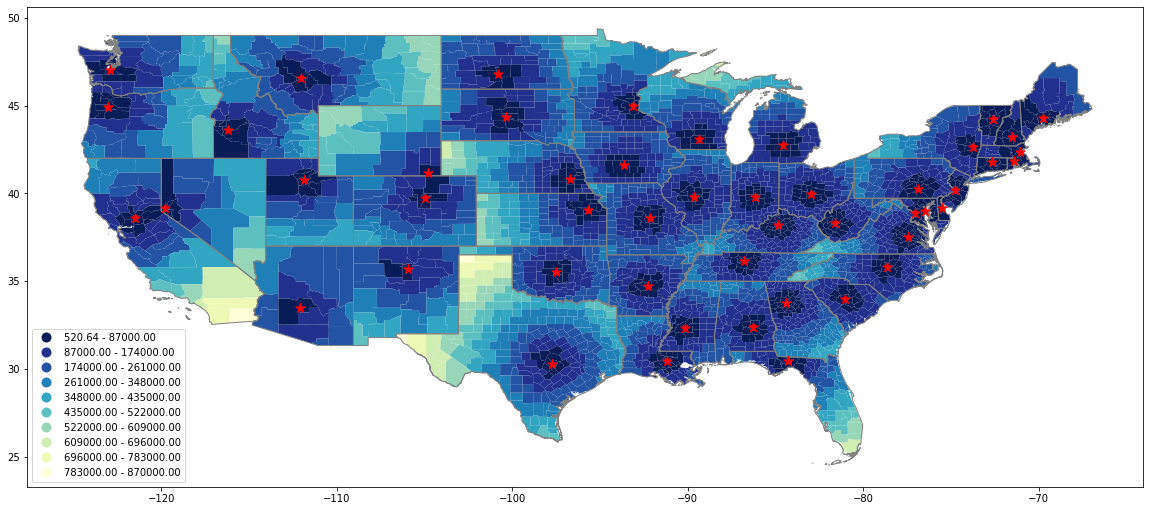

In [12]:
base_dis = df.plot(column='distance',cmap='YlGnBu_r', scheme='User_Defined',classification_kwds=dict(bins=[87000*i for i in range(1,11)]),
                figsize=(20,20), legend=True,legend_kwds=dict(loc='lower left',  frameon=True))
shape_state.plot(ax=base_dis, color='none', edgecolor='grey')
captial_data.plot(ax=base_dis, color='r', marker='*', markersize=100)
plt.savefig('./pic/distance.png')

# districution

In [13]:
circle_group_bed = df.groupby(["STATE_NAME","circle"])["BEDS"].mean()
# circle_group_bed
circle_group_covid = df.groupby(["STATE_NAME","circle"])["COVID"].mean()
# circle_group_covid
circle_group_pop = df.groupby(["STATE_NAME","circle"])["population"].mean()
# circle_group_pop

In [25]:
## get the districution
covid_districution, bed_districution, pop_districution = {},{},{}
for s in sorted(list(set(df["STATE_NAME"]))):
    temp_state_covid, temp_state_bed, temp_state_pop = [],[],[]
    for c in circle_group_bed[s].keys():
        temp_state_covid.append(circle_group_covid[s,c])
        temp_state_bed.append(circle_group_bed[s,c])
        temp_state_pop.append(circle_group_pop[s,c])
     
    covid_districution[s] = (np.array(temp_state_covid)/max(temp_state_covid)).tolist()
    bed_districution[s] = (np.array(temp_state_bed)/max(temp_state_bed)).tolist()
    pop_districution[s] = (np.array(temp_state_pop)/max(temp_state_pop)).tolist()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [26]:
covid_districution

{'Alabama': [1.0,
  0.15669054575500227,
  0.2654359340778825,
  0.05263621160109145],
 'Arizona': [1.0,
  0.10107715430861723,
  0.055632097528390115,
  0.016700066800267203],
 'Arkansas': [0.2791418081688848, 1.0, 0.09851613890163684],
 'California': [0.011630357308872293,
  0.013754908514584984,
  0.005378398944979873,
  0.0025039511605565714,
  0.01669094177073972,
  0.03160928445257058,
  1.0,
  0.047444916173417215,
  0.15888313861600917,
  0.01747807493259785],
 'Colorado': [1.0,
  0.19722013523666418,
  0.052967693463561234,
  0.014588029050838969,
  0.027861257200100176],
 'Connecticut': [1.0],
 'Delaware': [1.0],
 'District of Columbia': [nan],
 'Florida': [0.005923000987166831,
  0.00839091806515301,
  0.5005961462032538,
  0.05689136464062427,
  0.03129162161738667,
  0.012163305598646172,
  0.37159780002820475,
  1.0],
 'Georgia': [0.16898648035568462,
  0.08112402908341367,
  0.056414225249123325,
  1.0,
  0.05019911482119993],
 'Idaho': [1.0,
  0.34274193548387094,
  0.1

In [27]:
# write into file
jscovid = json.dumps(covid_districution)
jsbed = json.dumps(bed_districution)
jspop = json.dumps(pop_districution)
 
covid = open('./data/covid_districution.json', 'w')
covid.write(jscovid)
covid.close()
bed = open('./data/bed_districution.json', 'w')
bed.write(jsbed)
bed.close()
pop = open('./data/pop_districution.json', 'w')
pop.write(jspop)
pop.close()

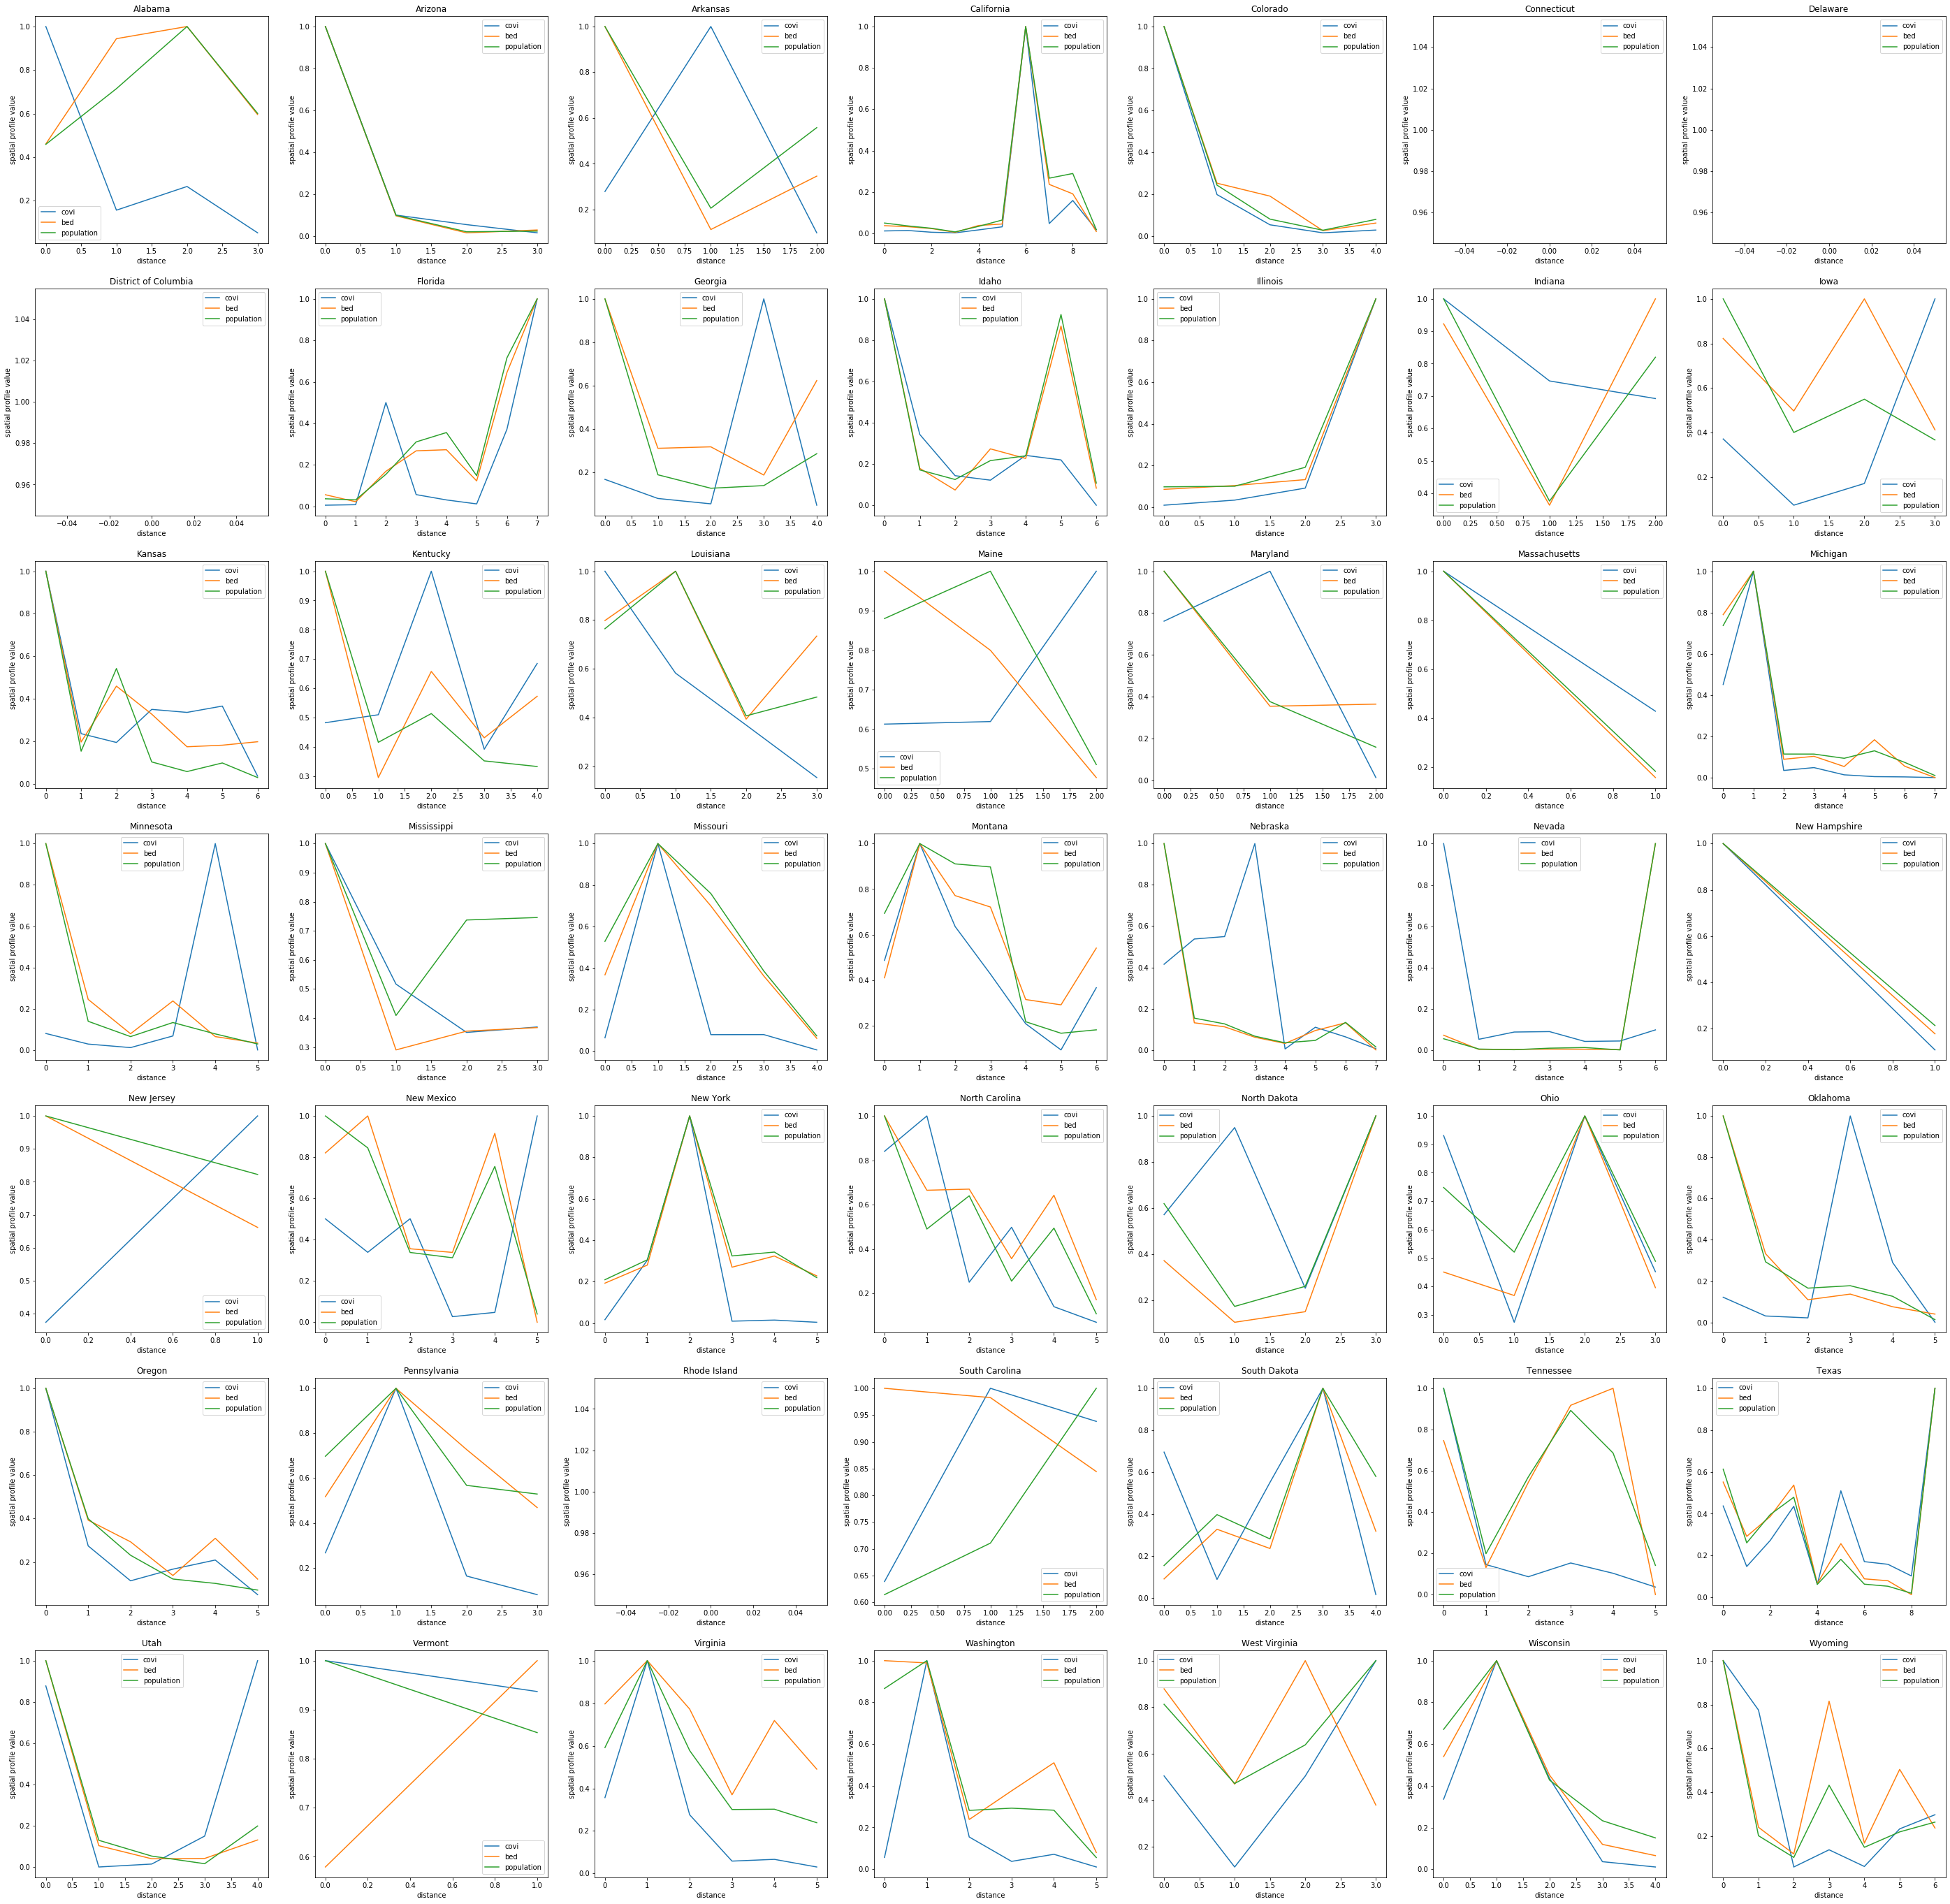

In [29]:

states = sorted(list(set(df["STATE_NAME"])))
f, ax = plt.subplots(7,7,figsize=(49,49))
ax = ax.flatten()
for i in range(len(states)):
    ax[i].plot(covid_districution[states[i]], label="covi")
    ax[i].plot(bed_districution[states[i]], label="bed")
    ax[i].plot(pop_districution[states[i]], label="population")
    ax[i].set_xlabel('distance')
    ax[i].set_ylabel('spatial profile value')
    ax[i].set_title("{}".format(states[i]))
    ax[i].legend(loc="best")
f.savefig("./pic/districution.png")